<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [34]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

/Users/samueladigun/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

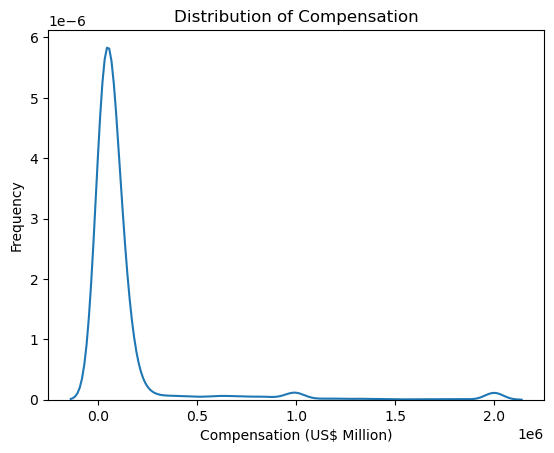

In [23]:
# your code goes here
import matplotlib.pyplot as plt 
import seaborn as sns 


# seaborn plot
sns.kdeplot(df['ConvertedComp'])

plt.title('Distribution of Compensation')
plt.xlabel('Compensation (US$ Million)')
plt.ylabel('Frequency')

Plot the histogram for the column `ConvertedComp`.


/Users/samueladigun/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

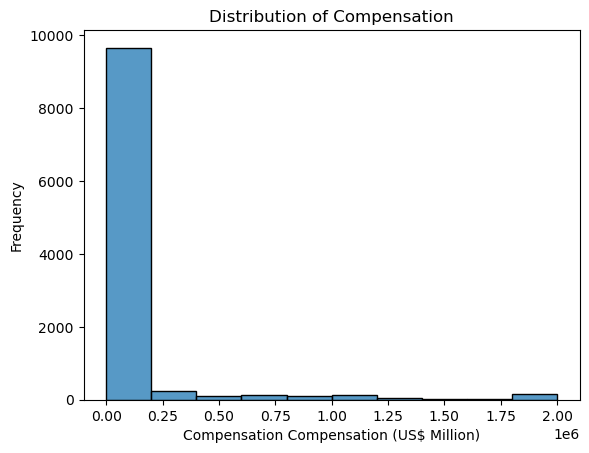

In [27]:
# your code goes here
# seaborn plot
sns.histplot(df['ConvertedComp'], bins = 10)

plt.title('Distribution of Compensation')
plt.xlabel('Compensation Compensation (US$ Million)')
plt.ylabel('Frequency')

What is the median of the column `ConvertedComp`?


In [31]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [39]:
# your code goes here
male = 0 

# loop through the gender column and count males 
for g in df['Gender']:
    if g == 'Man':
        male += 1


print(f'Males total: {male}')

Males total: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
# made subset for women
women_data = df[df['Gender'] == 'Woman']

# median comoensation females 
w_median_comp = women_data['ConvertedComp'].median()

print(f'Women median compensation: {w_median_comp}')

Women median compensation: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [44]:
# your code goes here
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median__age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

print(f'Min Age: {min_age}')
print(f'Q1 (25th percentile) Age: {q1_age}')
print(f'Median Age: {median__age}')
print(f'Q3 (75th percentile) Age: {q3_age}')
print(f'Max Age: {max_age}')

Min Age: 16.0
Q1 (25th percentile) Age: 25.0
Median Age: 29.0
Q3 (75th percentile) Age: 35.0
Max Age: 99.0


Plot a histogram of the column `Age`.


/Users/samueladigun/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

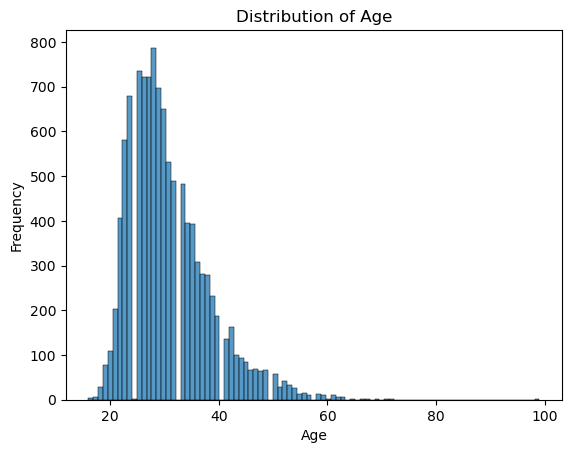

In [46]:
# your code goes here
sns.histplot(df['Age'])

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0, 0.5, 'Compensation (US$ Million)')

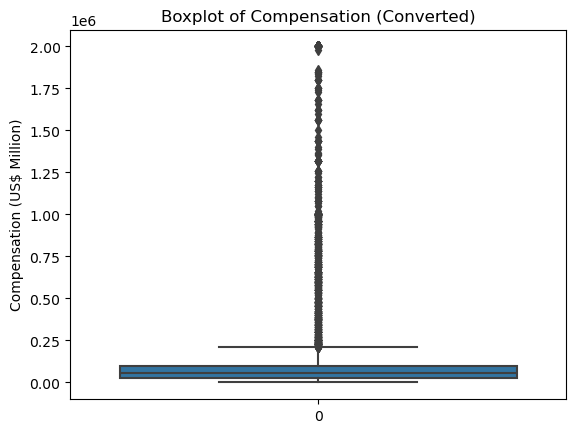

In [51]:
# your code goes here
comp = df['ConvertedComp'].dropna() # drop missing data points
sns.boxplot(comp)

plt.title('Boxplot of Compensation (Converted)')
plt.ylabel('Compensation (US$ Million)')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [54]:
# your code goes here
comp_q1 = df['ConvertedComp'].quantile(0.25)
comp_q3 = df['ConvertedComp'].quantile(0.75)
IQR = comp_q3 - comp_q1

print(f'The Interquartile range is {IQR}')

The Interquartile range is 73132.0


Find out the upper and lower bounds.


In [63]:
# your code goes here
lower_bound = df['ConvertedComp'].min()
upper_bound = df['ConvertedComp'].max()


print(f'The lower bound is {lower_bound} and the upper bound {upper_bound}')

The lower bound is 0.0 and the upper bound 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [62]:
lower_bound = comp_q1 - 1.5 * IQR
upper_bound = comp_q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-82830.0 209698.0


In [64]:
# your code goes here
lb = comp_q1 - 1.5 * IQR
ub = comp_q3 + 1.5 * IQR

outliers = 0

for c in df['ConvertedComp']:
    if c < lb or c > ub:
        outliers += 1
print(f'There are {outliers} outliers')

There are 879 outliers


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [73]:
# your code goes here
new_comp = df[(df['ConvertedComp'] >= lb) & (df['ConvertedComp'] <= ub)]

current_mean = new_comp['ConvertedComp'].mean()
previous_mean = df['ConvertedComp'].mean()

print(f'The current mean: {current_mean} and previous mean: {previous_mean}.')

The current mean: 59883.20838915799 and previous mean: 131596.7316197316.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [85]:
# your code goes here
numerical_columns = df[['Age', 'Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']]

numerical_columns.corr()['Age']

Age              1.000000
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
